In [48]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
import statsmodels.api as sm 
from patsy import dmatrices


In [73]:

Weekly = load_data('Weekly')
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [8]:
Weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


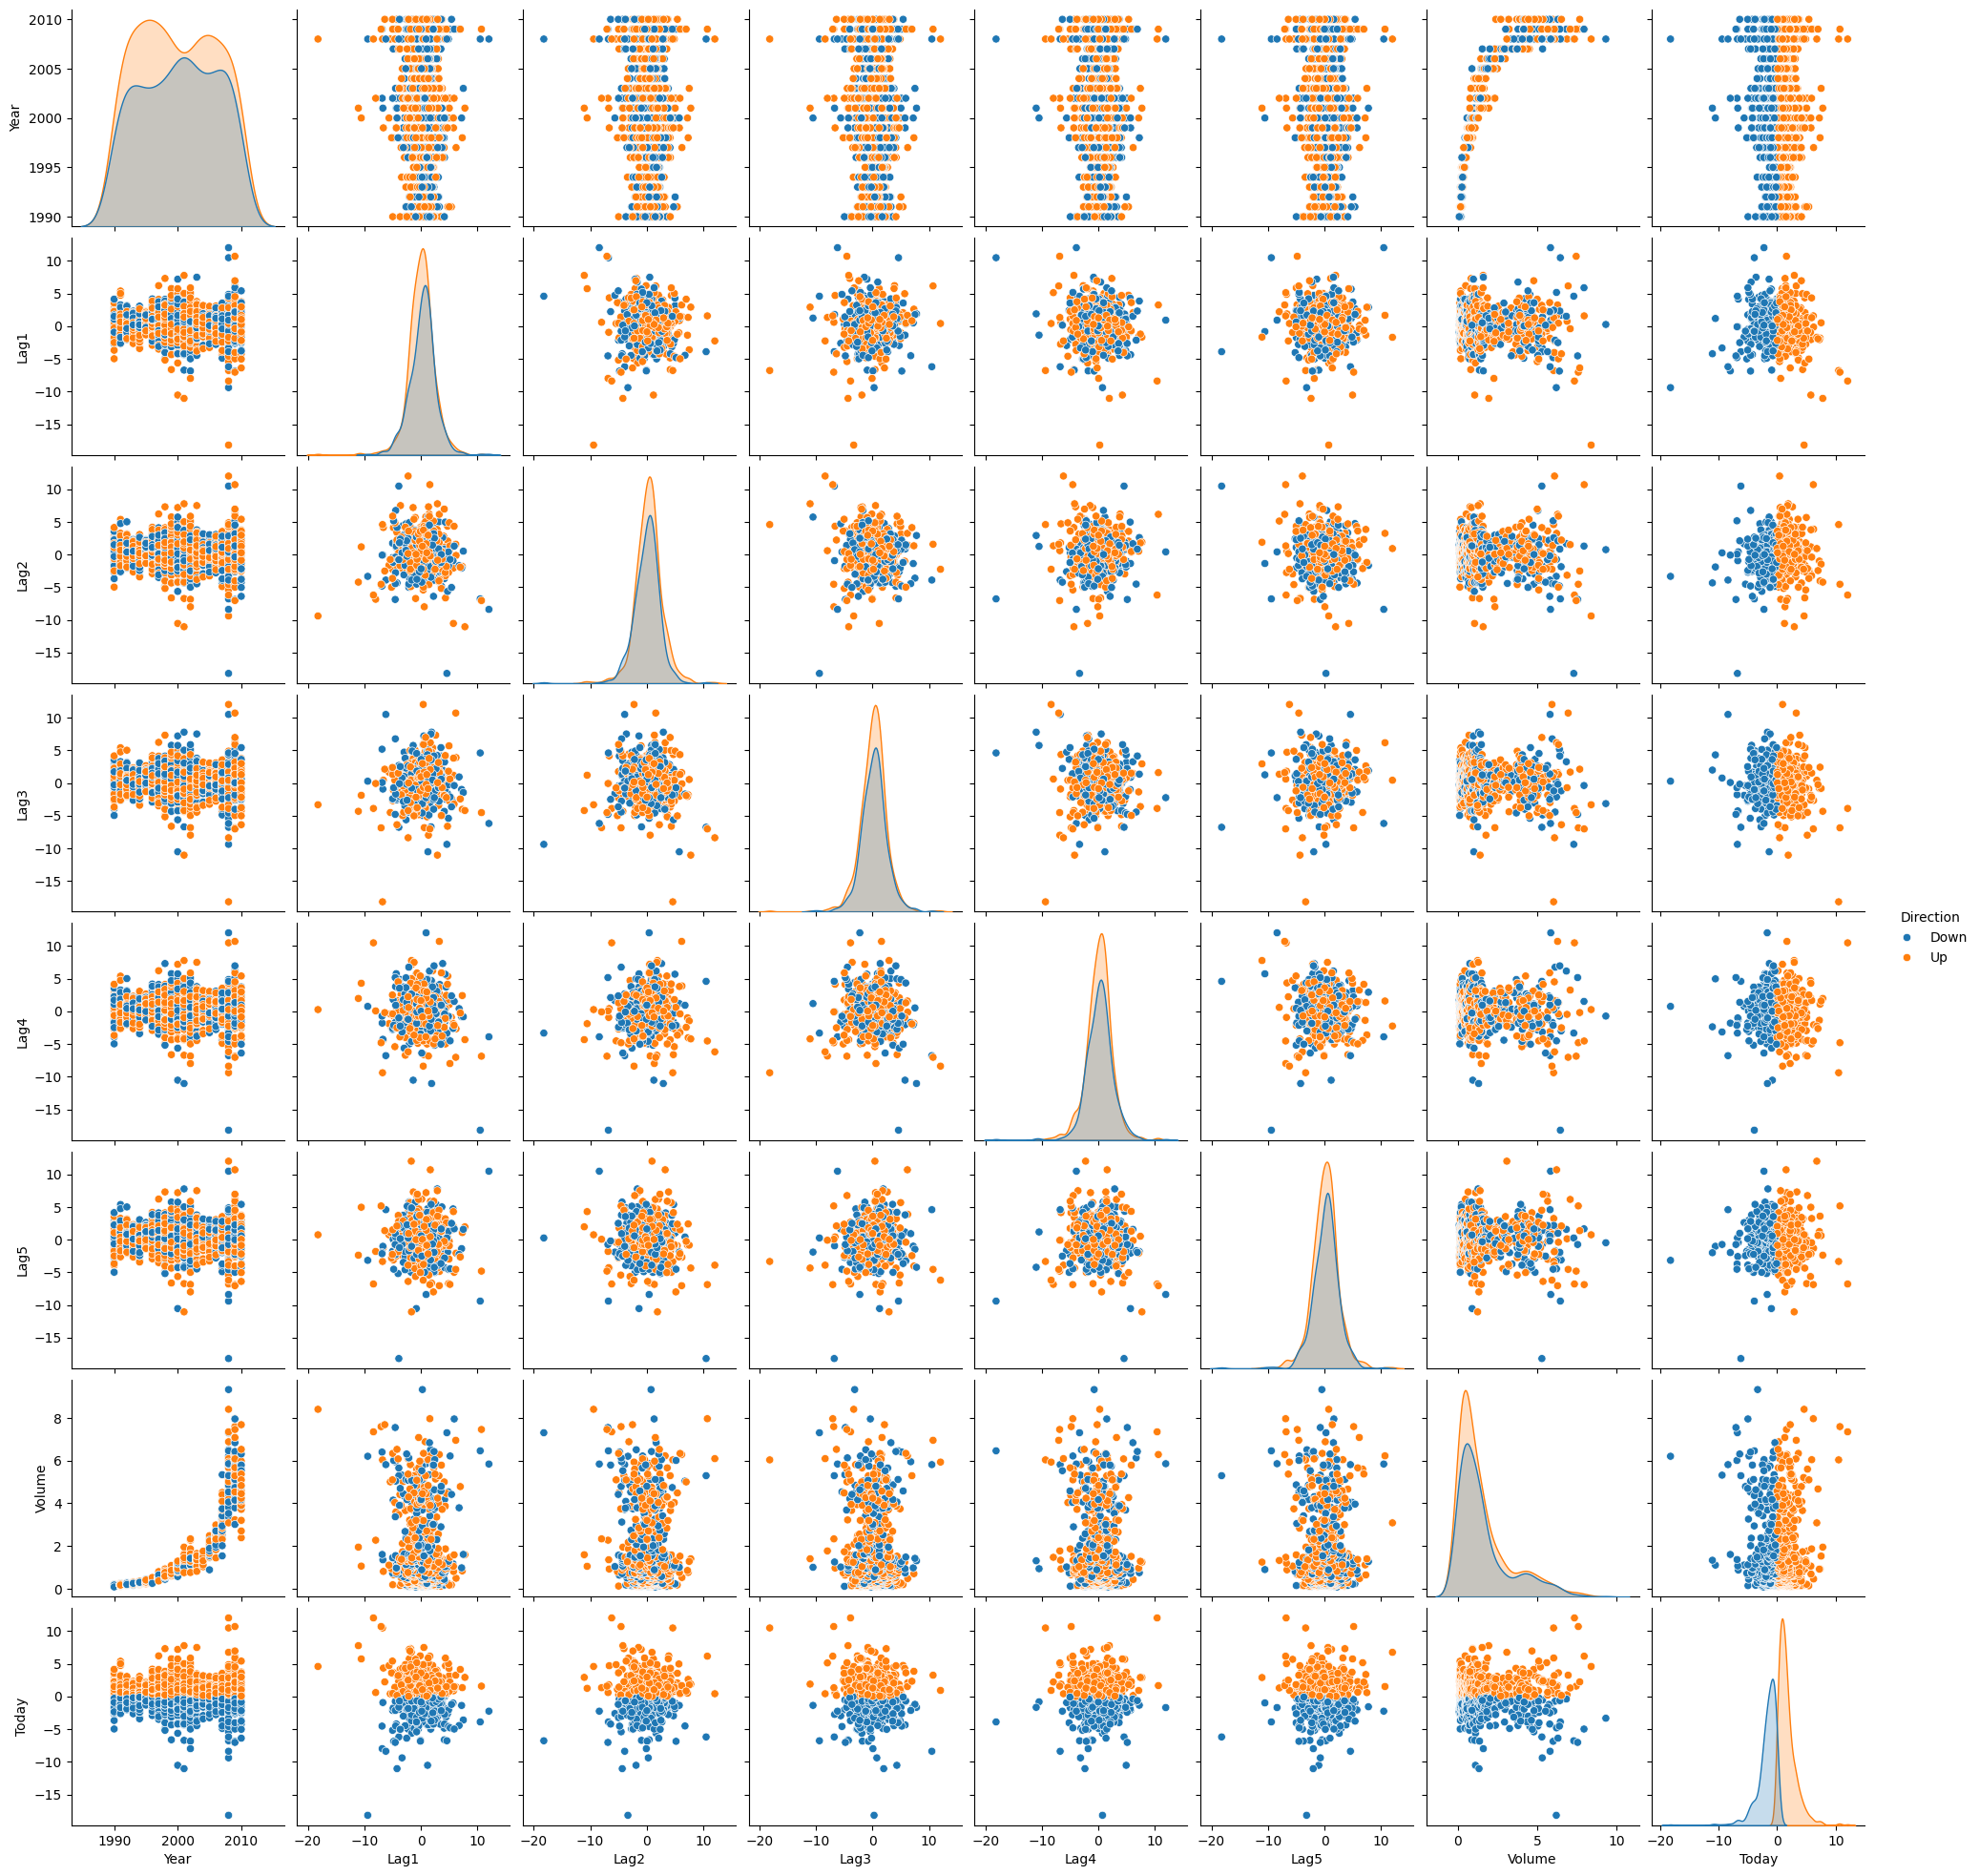

In [11]:
sns.pairplot(Weekly, hue='Direction',);

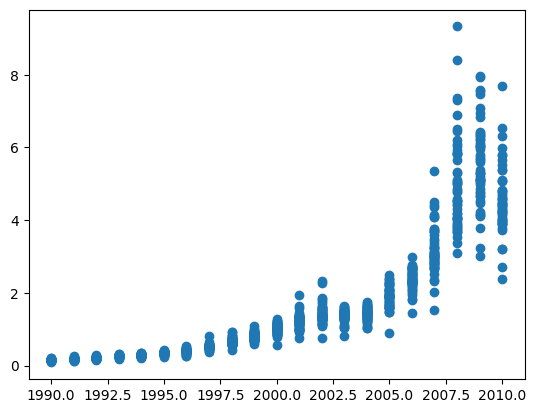

In [9]:
plt.scatter(Weekly['Year'],Weekly['Volume']);

The Year/Volume relationship appear to have some patterns

(b)

In [68]:
Weekly['Direction'] = Weekly['Today'].apply(lambda x: 'Up' if x > 0 else 'Down')
train_cols = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
lr = LogisticRegression()
mod = lr.fit(Weekly[train_cols], Weekly['Direction'])
print(mod.coef_)
print(mod.intercept_)

Weekly['Direction'] = Weekly['Direction'].map({'Down': 0, 'Up': 1})
y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=Weekly, return_type='dataframe')
logit = sm.Logit(y, X)
result = logit.fit()
print(result.summary())

[[-0.04123352  0.05839182 -0.01604123 -0.02777908 -0.01445306 -0.02273943]]
[0.26685095]
Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 02 May 2025   Pseudo R-squ.:                0.006580
Time:                        22:15:32   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.26

Lag2 is supposed to be a predictor with statistical significance

(c)

[[ 54 430]
 [ 48 557]]


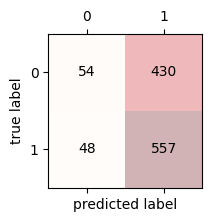

In [74]:
conf_mat = confusion_matrix(Weekly['Direction'], lr.predict(Weekly[train_cols]))
print(conf_mat)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

The confusion matrix displayed in the image provides valuable insights into our model's performance. With values of [[54, 430], [48, 557]], we can calculate that the overall accuracy is approximately 56.10% (611 correct predictions out of 1089 total).

This matrix reveals significant classification bias in our logistic regression model. While it correctly identifies about 92% of class 1 instances, it only correctly classifies about 11% of class 0 examples. The model shows a strong tendency to predict class 1, making this prediction for approximately 90.6% of all instances.

Such imbalanced performance suggests potential issues with the decision threshold, class distribution in the training data, or feature relevance. Despite the moderate overall accuracy, the model's high false positive rate (88.85%) indicates it struggles to correctly identify class 0 examples. For more balanced evaluation, additional metrics like precision, recall, and F1 score should be considered.



(d)

In [ ]:
df8 = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]
df0 = Weekly[(Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)]


X = df8['Lag2'].values.reshape(-1, 1)

mod = lr.fit(X, df8['Direction']) 

X = df0['Lag2'].values.reshape(-1, 1)

conf_mat = confusion_matrix(df0['Direction'], lr.predict(X))
print(conf_mat)


lr.score(X, df0['Direction'])

[[ 9 34]
 [ 5 56]]


0.625

(g)

In [ ]:
X = df_9908['Lag2']
X = X.to_numpy().reshape(np.shape(X)[0],1)
nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X,df_9908['Direction'])
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
X = df_0910['Lag2']
X = X.to_numpy().reshape(np.shape(X)[0],1)

conf_mat = confusion_matrix(df_0910['Direction'], nbrs.predict(X))
print(conf_mat)

[[21 22]
 [30 31]]


In [ ]:
nbrs.score(X, df0['Direction'])

0.5

(j)

In [ ]:
n_nbrs = 9
X = df8['Lag2']
X = X.to_numpy().reshape(np.shape(X)[0],1)
nbrs = KNeighborsClassifier(n_neighbors=3)
nbrs.fit(X,df8['Direction'])
X = df0['Lag2']
X = X.to_numpy().reshape(np.shape(X)[0],1)
conf_mat = confusion_matrix(df0['Direction'], nbrs.predict(X))
print(conf_mat)

[[16 27]
 [19 42]]
